In [1]:
import h5py
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

In [2]:
os.getcwd()

'/Users/wing/ixig/FourthBrain/Kaggle'

## Create HDF5

In [3]:
FILENAME = 'data.hdf5'
f = h5py.File(FILENAME, 'w-')

In [4]:
g_train = f.create_group('train')
g_test = f.create_group('test')

In [5]:
g_by_pos = f.create_group('by/pos')
g_by_neg = f.create_group('by/neg')

In [6]:
TRAIN_DIR = 'data/train/gray/'
TRAIN_FILES = os.listdir(TRAIN_DIR)
len(TRAIN_FILES)

220025

In [7]:
TEST_DIR = 'data/test/gray/'
TEST_FILES = os.listdir(TEST_DIR)
len(TEST_FILES)

57458

In [8]:
IMG_SIZE = (96, 96)

In [9]:
df = pd.read_csv('data/train_labels.csv')
TRAIN_IDS = [ df[df['label'] == 0]['id'].values.tolist(), df[df['label'] == 1]['id'].values.tolist() ]

In [10]:
TEST_IDS = [os.path.splitext(p)[0] for p in TEST_FILES]

In [11]:
TRAIN_IDS[1][0]

'c18f2d887b7ae4f6742ee445113fa1aef383ed77'

In [12]:
TRAIN_FILES[0]

'f0c2a0b8ef3024f407fa97d852d49be0215cafe0.tif'

In [13]:
TEST_IDS[0]

'fd0a060ef9c30c9a83f6b4bfb568db74b099154d'

In [14]:
def create_train_dsets(label: int, m: int):
    count_pos, count_neg = 0, 0
    for id in TRAIN_IDS[label][:m]:
        img = imread(TRAIN_DIR + id + '.tif')
        assert img.dtype == 'uint8'
        assert img.shape == IMG_SIZE
        dset = g_train.create_dataset(id, data=img)
        if label == 1:
            g_by_pos[str(count_pos)] = dset
            count_pos += 1
        elif label == 0:
            g_by_neg[str(count_neg)] = dset
            count_neg += 1
        else:
            raise Exception
        dset.attrs['label'] = label
        dset.attrs['cmap'] = 'gray'

In [15]:
# create_train_dsets(0, 10)
create_train_dsets(0, len(TRAIN_IDS[0]))

In [16]:
# create_train_dsets(1, 10)
create_train_dsets(1, len(TRAIN_IDS[1]))

In [17]:
def create_test_dsets(m: int):
    for id in TEST_IDS[:m]:
        img = imread(TEST_DIR + id + '.tif')
        assert img.dtype == 'uint8'
        assert img.shape == IMG_SIZE
        dset = g_test.create_dataset(id, data=img)
        dset.attrs['cmap'] = 'gray'

In [18]:
# create_test_dsets(10)
create_test_dsets(len(TEST_IDS))

In [19]:
f.close()

## Check / Inspect HDF5

In [20]:
FILENAME = 'data.hdf5'
f = h5py.File(FILENAME, 'r')

In [21]:
f.keys()

<KeysViewHDF5 ['by', 'test', 'train']>

In [22]:
len(f['test'])

57458

In [23]:
len(f['train'])

220025

In [24]:
f['by'].keys()

<KeysViewHDF5 ['neg', 'pos']>

In [25]:
len(f['by/pos'])

89117

In [26]:
len(f['by/neg'])

130908

In [28]:
train_ids = list(f['train'])[:5]
train_ids

['00001b2b5609af42ab0ab276dd4cd41c3e7745b5',
 '000020de2aa6193f4c160e398a8edea95b1da598',
 '00004aab08381d25d315384d646f5ce413ea24b1',
 '0000d563d5cfafc4e68acb7c9829258a298d9b6a',
 '0000da768d06b879e5754c43e2298ce48726f722']

In [29]:
labels = [f['train'][x].attrs['label'] for x in train_ids]
labels

[1, 0, 0, 0, 1]

In [30]:
sum(labels)

2

In [31]:
labels = [f['train'][x].attrs['cmap'] for x in train_ids]
labels[:5]

['gray', 'gray', 'gray', 'gray', 'gray']

In [33]:
test_ids = list(f['test'])[:5]
test_ids

['00006537328c33e284c973d7b39d340809f7271b',
 '0000ec92553fda4ce39889f9226ace43cae3364e',
 '00024a6dee61f12f7856b0fc6be20bc7a48ba3d2',
 '000253dfaa0be9d0d100283b22284ab2f6b643f6',
 '000270442cc15af719583a8172c87cd2bd9c7746']

In [34]:
labels = [f['test'][x].attrs['cmap'] for x in test_ids]
labels[:5]

['gray', 'gray', 'gray', 'gray', 'gray']

In [35]:
it = iter(f['train'])

In [38]:
img = f['train'][next(it)]
img.shape, img.dtype

((96, 96), dtype('uint8'))

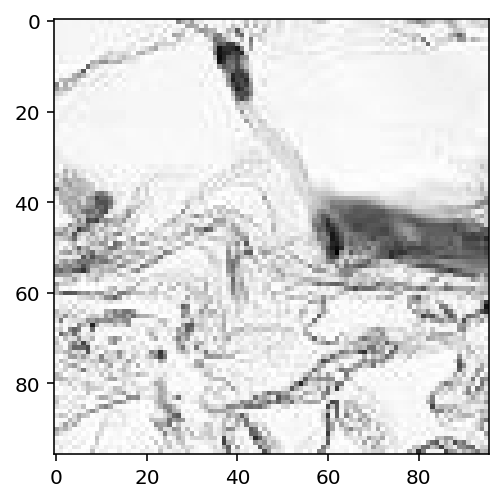

In [39]:
plt.imshow(img, cmap='gray');

In [40]:
f.close()